In [108]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [124]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission_iA3afxn.csv')

In [125]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [126]:
train['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [127]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [128]:
map1={'> 2 Years':0, '1-2 Year':1, '< 1 Year':2}

In [129]:
dat=pd.concat([train,test])

In [130]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score

In [131]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [132]:
cols=['Gender','Region_Code',
       'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel']

In [133]:
dat['Vehicle_Age']=dat['Vehicle_Age'].map(map1)

In [134]:
dat

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,0,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,0,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,2,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,2,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,2,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,2,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1,No,62875.0,26.0,265,NaN


In [135]:
for col in cols:
    enc=LabelEncoder()
    dat[col]=enc.fit_transform(dat[col])

In [136]:
dat['Vintage']=dat['Vintage']/365
dat['Paid']=dat['Annual_Premium']*dat['Vintage']

In [137]:
dat

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Paid
0,1,1,44,1,28,0,0,1,40454.0,24,0.594521,1.0,24050.734247
1,2,1,76,1,3,0,1,0,33536.0,24,0.501370,0.0,16813.939726
2,3,1,47,1,28,0,0,1,38294.0,24,0.073973,1.0,2832.706849
3,4,1,21,1,11,1,2,0,28619.0,147,0.556164,0.0,15916.868493
4,5,0,29,1,41,1,2,0,27496.0,147,0.106849,0.0,2937.928767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37,1,2,0,30867.0,147,0.153425,NaN,4735.758904
127033,508143,0,38,1,28,0,1,1,28700.0,117,0.452055,NaN,12973.972603
127034,508144,1,21,1,46,1,2,0,29802.0,147,0.202740,NaN,6042.049315
127035,508145,1,71,1,28,1,1,0,62875.0,24,0.726027,NaN,45648.972603


In [138]:
train=dat.iloc[:len(train)]
test=dat.iloc[len(train):]

In [139]:
X=train.drop(['Response','id'],axis=1)
y=train['Response']
test1=test.drop(['id','Response'],axis=1)

In [140]:
from catboost import CatBoostClassifier

In [141]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=2021,shuffle=True)

In [148]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Paid
95143,1,42,1,19,0,1,0,2630.0,24,0.232877,612.465753
118116,1,22,1,41,1,2,0,21364.0,147,0.134247,2868.043836
124069,0,55,1,28,0,1,1,50624.0,53,0.747945,37863.978082
106142,0,25,1,6,1,2,0,24531.0,147,0.249315,6115.947945
348703,1,24,1,8,1,2,0,43846.0,155,0.520548,22823.945205
...,...,...,...,...,...,...,...,...,...,...,...
44646,1,32,1,29,1,2,0,31874.0,147,0.810959,25848.504110
37660,1,26,1,29,1,2,0,30419.0,147,0.038356,1166.756164
3352,0,61,1,28,0,1,1,36556.0,24,0.397260,14522.246575
373928,1,39,1,6,1,1,0,24202.0,119,0.257534,6232.843836


In [149]:
 cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']
 model=CatBoostClassifier(eval_metric='AUC')
 model.fit(X_train,y_train,cat_features=cat_col,verbose=3,eval_set=(X_test,y_test),early_stopping_rounds=50)
 probs_cat_test = model.predict_proba(X_test)[:, 1]
 roc_auc_score(y_test, probs_cat_test)

Learning rate set to 0.128106
0:	test: 0.8332159	best: 0.8332159 (0)	total: 531ms	remaining: 8m 50s
3:	test: 0.8437864	best: 0.8437864 (3)	total: 2.17s	remaining: 9m 1s
6:	test: 0.8437768	best: 0.8438127 (4)	total: 3.31s	remaining: 7m 50s
9:	test: 0.8495653	best: 0.8495653 (9)	total: 4.77s	remaining: 7m 52s
12:	test: 0.8539713	best: 0.8539713 (12)	total: 5.94s	remaining: 7m 31s
15:	test: 0.8555452	best: 0.8555452 (15)	total: 7.1s	remaining: 7m 16s
18:	test: 0.8559806	best: 0.8559806 (18)	total: 8.32s	remaining: 7m 9s
21:	test: 0.8565401	best: 0.8565401 (21)	total: 9.64s	remaining: 7m 8s
24:	test: 0.8570181	best: 0.8570181 (24)	total: 10.6s	remaining: 6m 52s
27:	test: 0.8572756	best: 0.8572756 (27)	total: 12s	remaining: 6m 58s
30:	test: 0.8575891	best: 0.8575891 (30)	total: 13.5s	remaining: 7m
33:	test: 0.8578235	best: 0.8578235 (33)	total: 14.6s	remaining: 6m 55s
36:	test: 0.8579583	best: 0.8579583 (36)	total: 15.5s	remaining: 6m 43s
39:	test: 0.8580827	best: 0.8580827 (39)	total: 17.1

0.8594655246728196

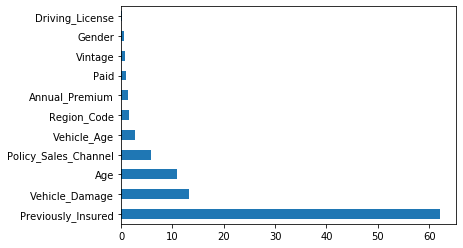

In [150]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [100]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 16, 'n_estimators': 512, 'num_leaves': 64}

In [151]:
p=model.predict_proba(test1)[:,1]
sample['Response']=p

In [152]:
sample

,id,Response
0,381110,0.000335
1,381111,0.287546
2,381112,0.300629
3,381113,0.005909
4,381114,0.000412
...,...,...
127032,508142,0.000300
127033,508143,0.333348
127034,508144,0.000270
127035,508145,0.000088


In [153]:
sample.to_csv('Pred13.csv',index=False)